In [17]:
from qiskit.transpiler.coupling import CouplingMap

from src.clonk.backend_utils.mock_backends.Corral_backend_v1 import FakeCorral
import numpy as np


def pretty_print(edge_list, simple=True):
    if simple:
        temp = list(edge_list)
        temp2 = []
        for i, j in temp:
            if not (j, i) in temp2:
                temp2.append((i, j))
        edge_list = temp2

    x = CouplingMap(edge_list)

    # black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io

    formatter2 = lambda _: dict(dir="none")
    dot_str = x.graph.to_dot(edge_attr=formatter2, graph_attr={"size": "0"})
    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    # png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

In [6]:
# define corral
def corral(num_snails=32, num_levels=2):
    """returns edge list of a corral of size specified
    snails are nodes, edges are qubits"""

    snail_edge_list = []
    for snail0, snail1 in zip(range(num_snails), range(1, num_snails + 1)):
        for i in range(num_levels):
            snail_edge_list.append((snail0, snail1 % num_snails))
    return snail_edge_list

In [9]:
def snail_to_connectivity(snail_edge_list):
    # Convert snail edge list where nodes are snails and edges are qubits
    # To connectivity edge list where nodes are qubits and edges are coupling
    edge_list = []

    # qubits are coupled to a snail edge if they are both adjacent to a snail node
    for qubit, snail_edge in enumerate(snail_edge_list):
        for temp_qubit, temp_snail_edge in enumerate(snail_edge_list):
            if qubit != temp_qubit and (
                snail_edge[0] in temp_snail_edge or snail_edge[1] in temp_snail_edge
            ):
                edge_list.append((qubit, temp_qubit))
    return edge_list

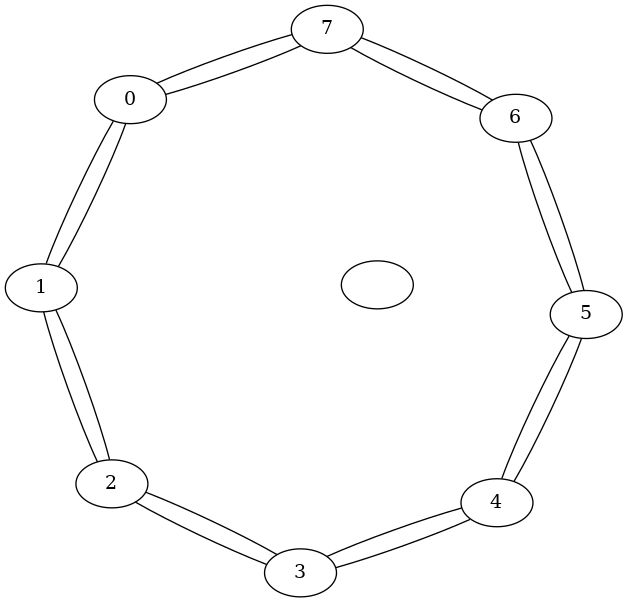

snail list: [(0, 1), (0, 1), (1, 2), (1, 2), (2, 3), (2, 3), (3, 4), (3, 4), (4, 5), (4, 5), (5, 6), (5, 6), (6, 7), (6, 7), (7, 0), (7, 0)]
qb list: [(0, 1), (0, 2), (0, 3), (0, 14), (0, 15), (1, 0), (1, 2), (1, 3), (1, 14), (1, 15), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 10), (8, 11), (9, 6), (9, 7), (9, 8), (9, 10), (9, 11), (10, 8), (10, 9), (10, 11), (10, 12), (10, 13), (11, 8), (11, 9), (11, 10), (11, 12), (11, 13), (12, 10), (12, 11), (12, 13), (12, 14), (12, 15), (13, 10), (13, 11), (13, 12), (13, 14), (13, 15), (14, 0), (14, 1), (14, 12), (14, 13), (14, 15), (15, 0), (15, 1), (15, 12), (15, 13), (15, 14)]


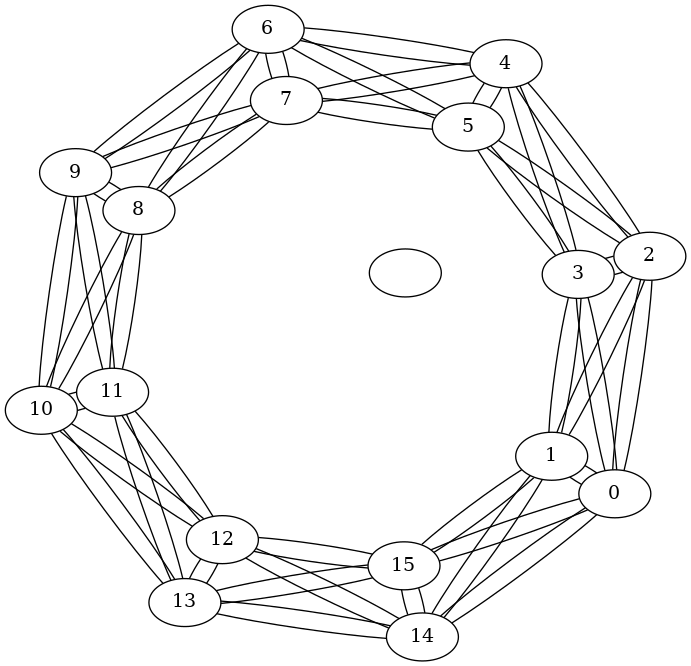

In [12]:
c = corral(8,2)
display(pretty_print(c))
print(f'snail list: {c}')

c = snail_to_connectivity(c)
print(f'qb list: {c}')
pretty_print(c)

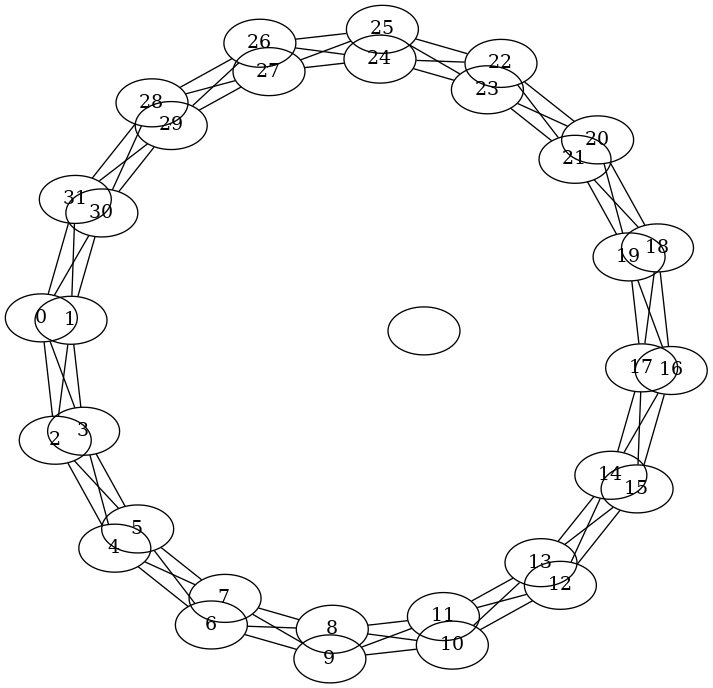

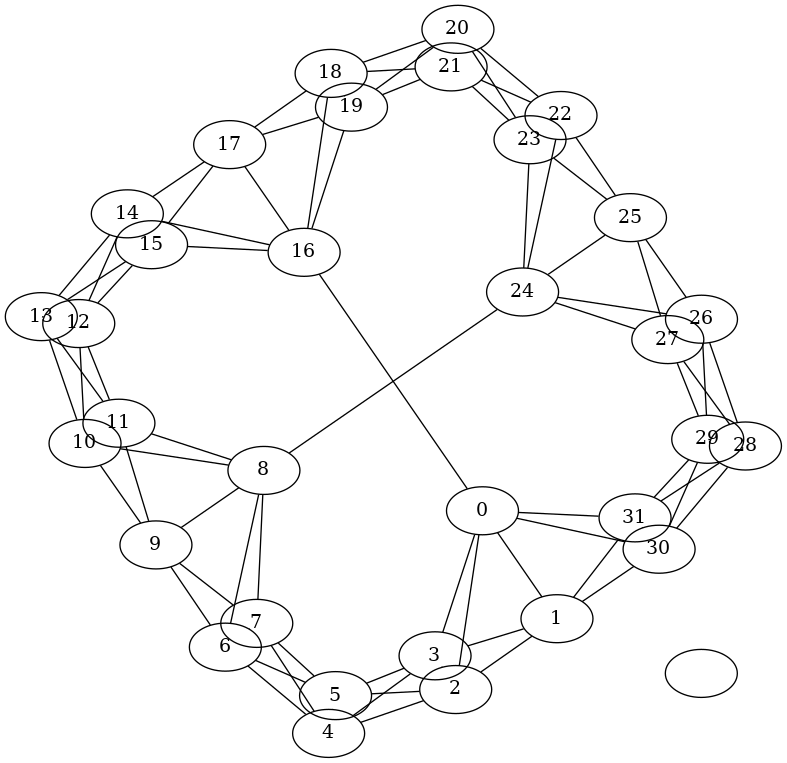

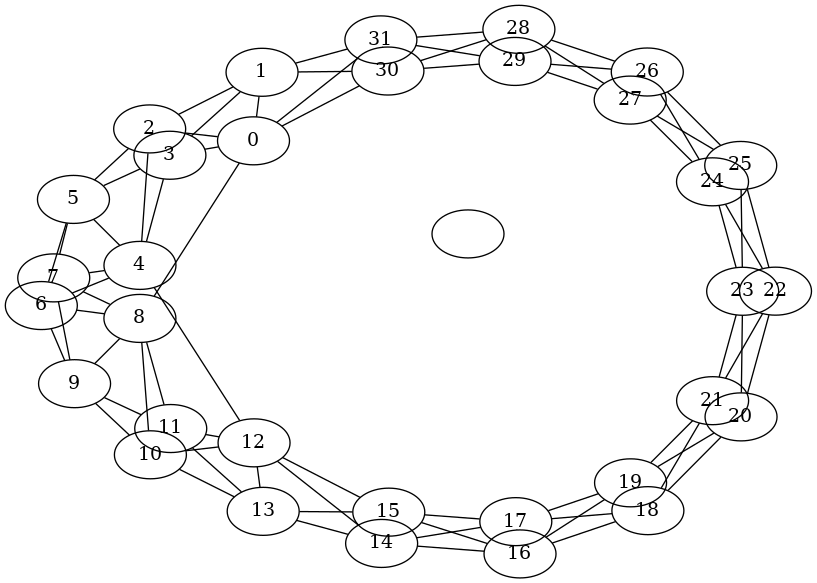

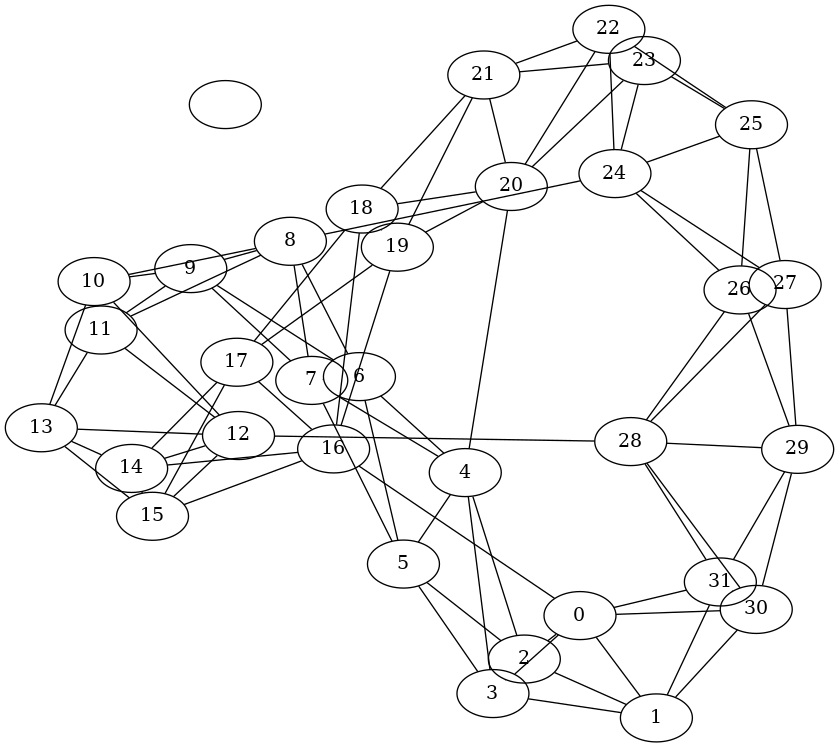

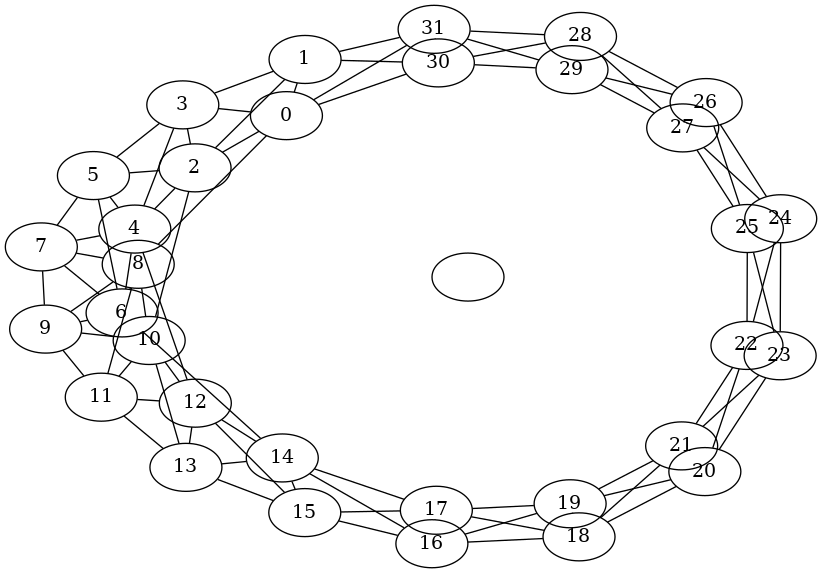

In [18]:
c = FakeCorral()
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_16_2 = c.divideCorralK_math(basic_corral_16_2, 16, 2)
new_edges_32_2 = c.divideCorralK_math(basic_corral_16_2, 32, 2)
new_edges_16_4 = c.divideCorralK_math(basic_corral_16_2, 16, 4)
new_edges_32_4 = c.divideCorralK_math(basic_corral_16_2, 32, 4)

corral_16_2 = np.append(basic_corral_16_2, new_edges_16_2, axis=0)
corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_16_4 = np.append(basic_corral_16_2, new_edges_16_4, axis=0)
corral_32_4 = np.append(basic_corral_16_2, new_edges_32_4, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_16_2))
display(pretty_print(corral_32_4))
display(pretty_print(corral_16_4))

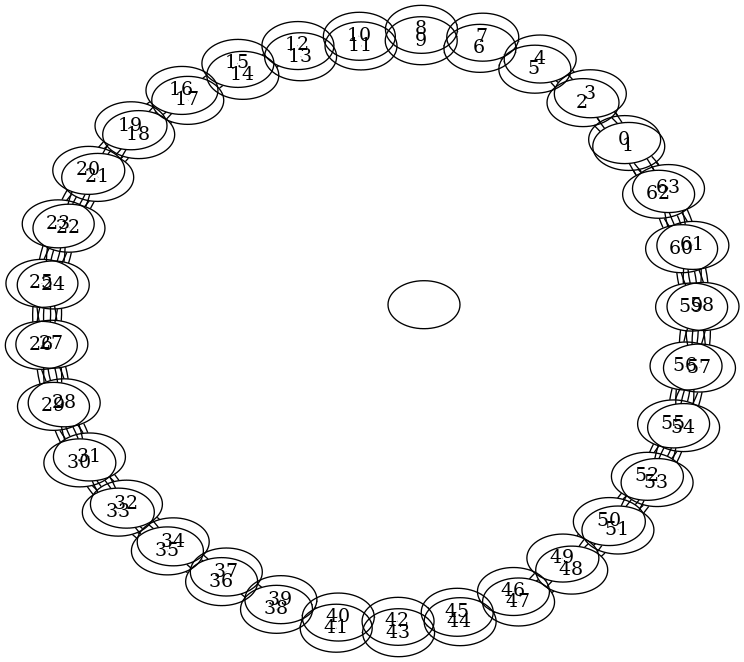

320
[(0, 1), (0, 2), (0, 3), (0, 62), (0, 63), (1, 0), (1, 2), (1, 3), (1, 62), (1, 63), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 10), (8, 11), (9, 6), (9, 7), (9, 8), (9, 10), (9, 11), (10, 8), (10, 9), (10, 11), (10, 12), (10, 13), (11, 8), (11, 9), (11, 10), (11, 12), (11, 13), (12, 10), (12, 11), (12, 13), (12, 14), (12, 15), (13, 10), (13, 11), (13, 12), (13, 14), (13, 15), (14, 12), (14, 13), (14, 15), (14, 16), (14, 17), (15, 12), (15, 13), (15, 14), (15, 16), (15, 17), (16, 14), (16, 15), (16, 17), (16, 18), (16, 19), (17, 14), (17, 15), (17, 16), (17, 18), (17, 19), (18, 16), (18, 17), (18, 19), (18, 20), (18, 21), (19, 16), (19, 17), (19, 18), (19, 20), (19, 21), (20, 18), (20, 19), (20, 21), (20, 22), (20, 23), (21, 18), (21, 19), (21, 20), (21, 22), (

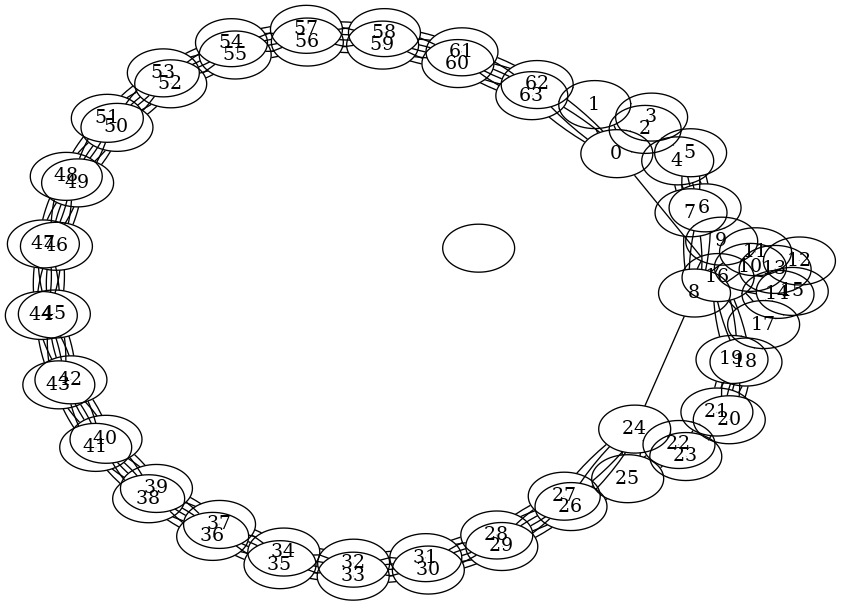

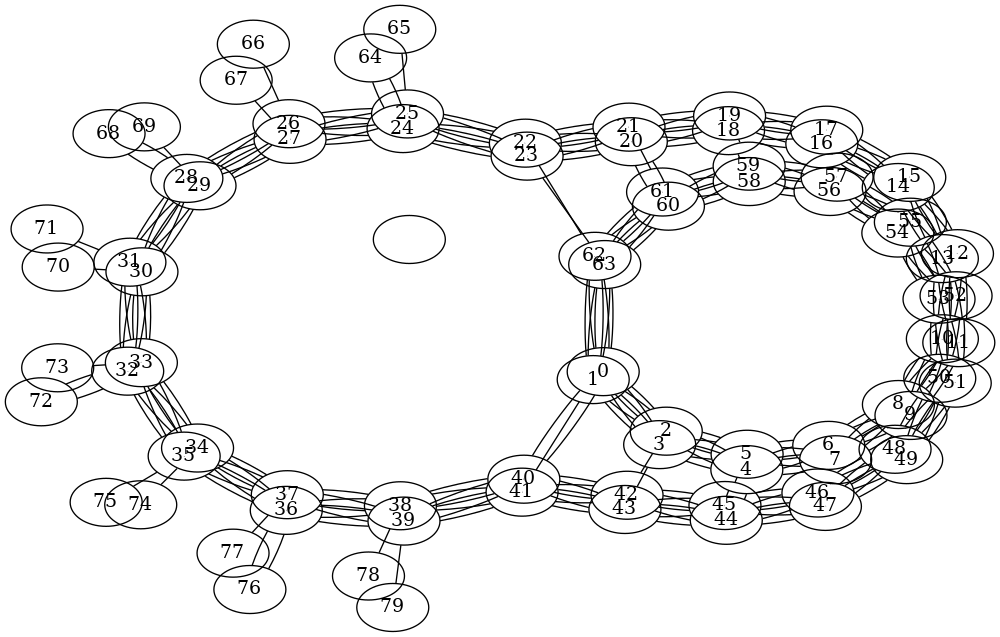

In [6]:
c = FakeCorral()
basic_corral_32_2 = corral(32, 2)
basic_corral_32_2 = snail_to_connectivity(basic_corral_32_2)
display(pretty_print(basic_corral_32_2))
print(len(basic_corral_32_2))
new_edges_32_12 = c.divideCorralK_math(basic_corral_32_2, 32, 12)
new_edges_80_50 = c.divideCorralK_math(basic_corral_32_2, 80, 50)


corral_32_2 = np.append(basic_corral_32_2, new_edges_32_2, axis=0)
corral_80_50 = np.append(basic_corral_32_2, new_edges_80_50, axis=0)
print(basic_corral_32_2)
print(new_edges_32_2)

display(pretty_print(corral_32_2))
display(pretty_print(corral_80_50))

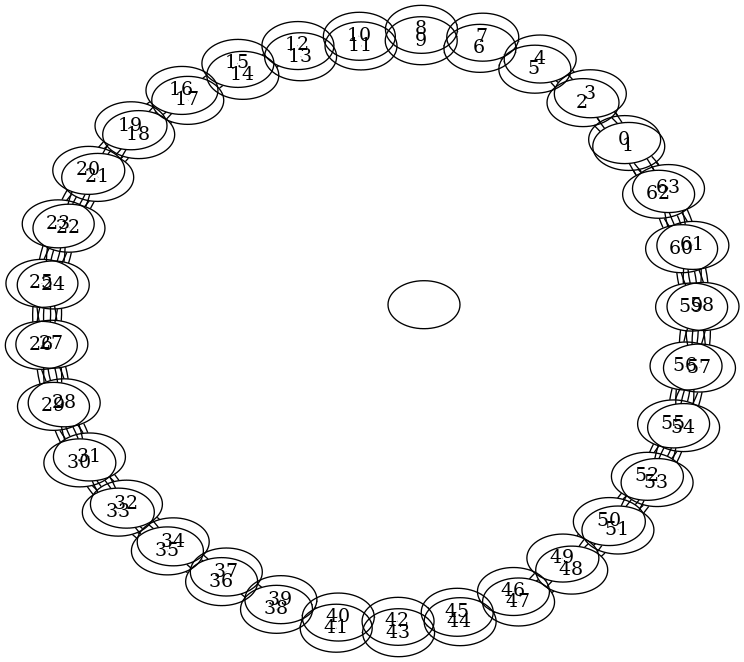

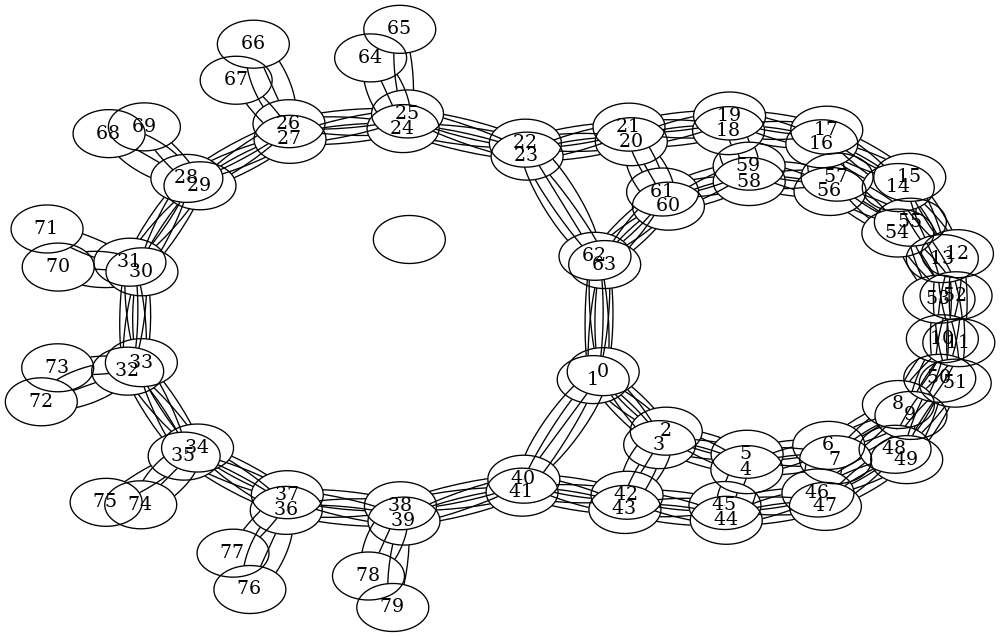

In [7]:
c = FakeCorral()
basic_corral_32_2 = corral(32, 2)
basic_corral_32_2 = snail_to_connectivity(basic_corral_32_2)
display(pretty_print(basic_corral_32_2))
new_edges = c.divideCorralK_math(basic_corral_32_2, 80, 100)

corral_new = np.append(basic_corral_32_2, new_edges, axis=0)

display(pretty_print(corral_new))

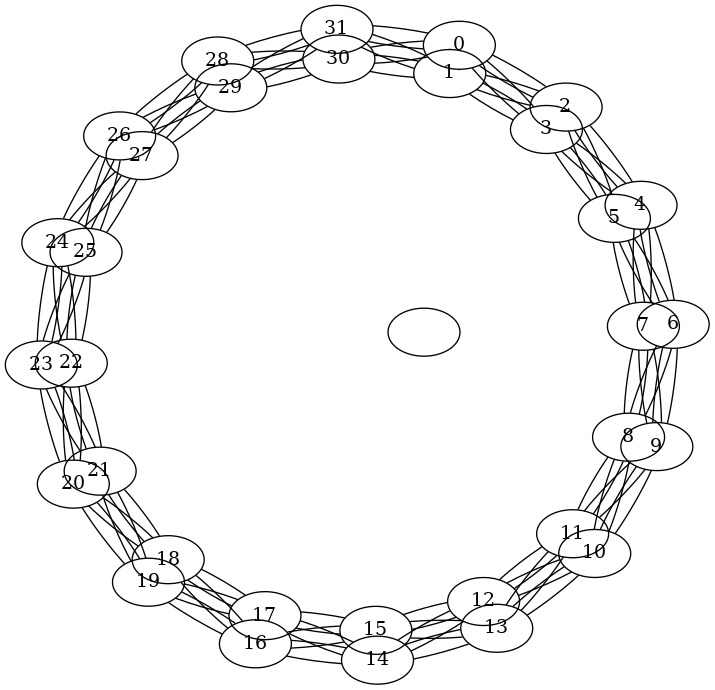

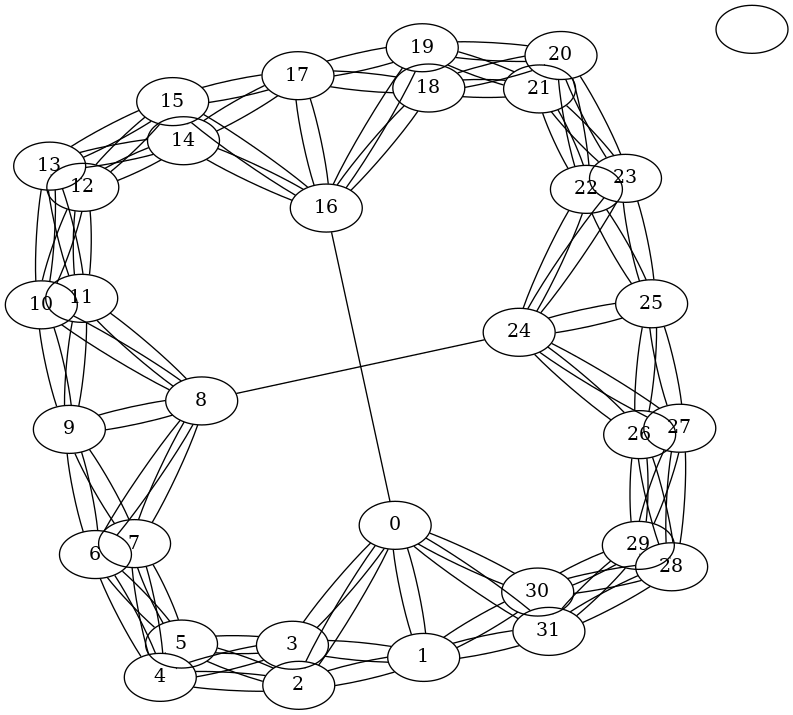

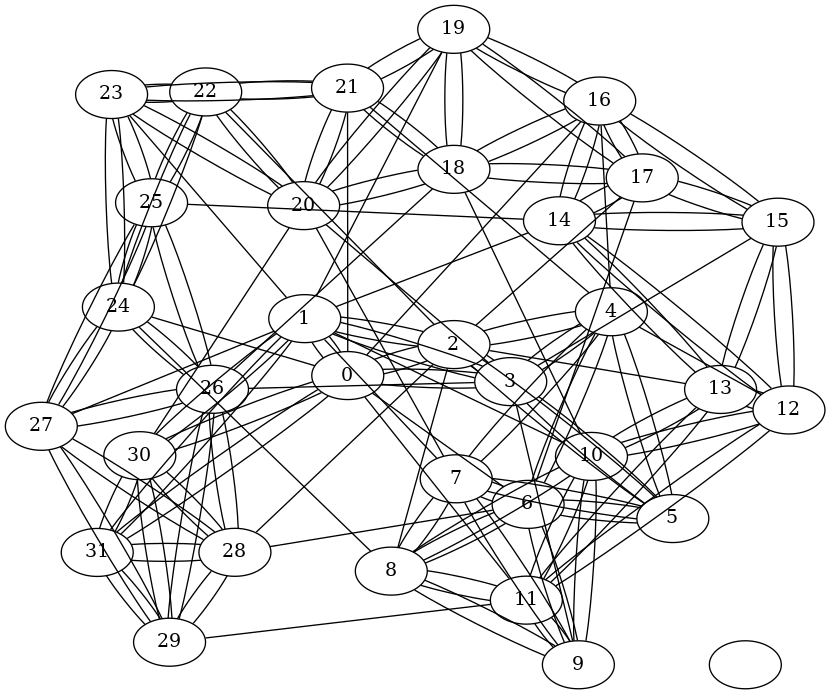

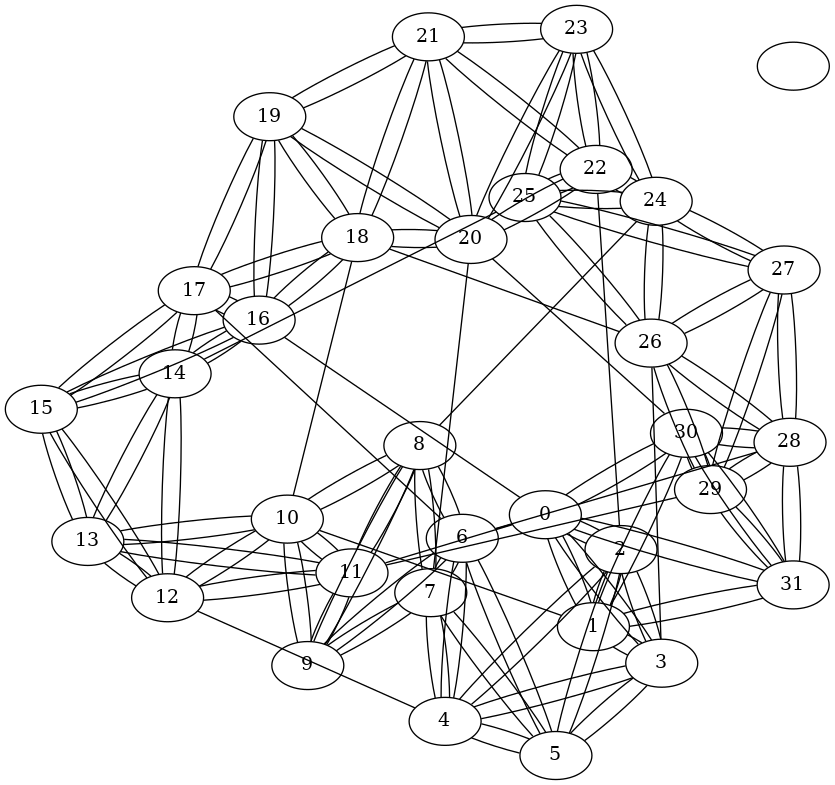

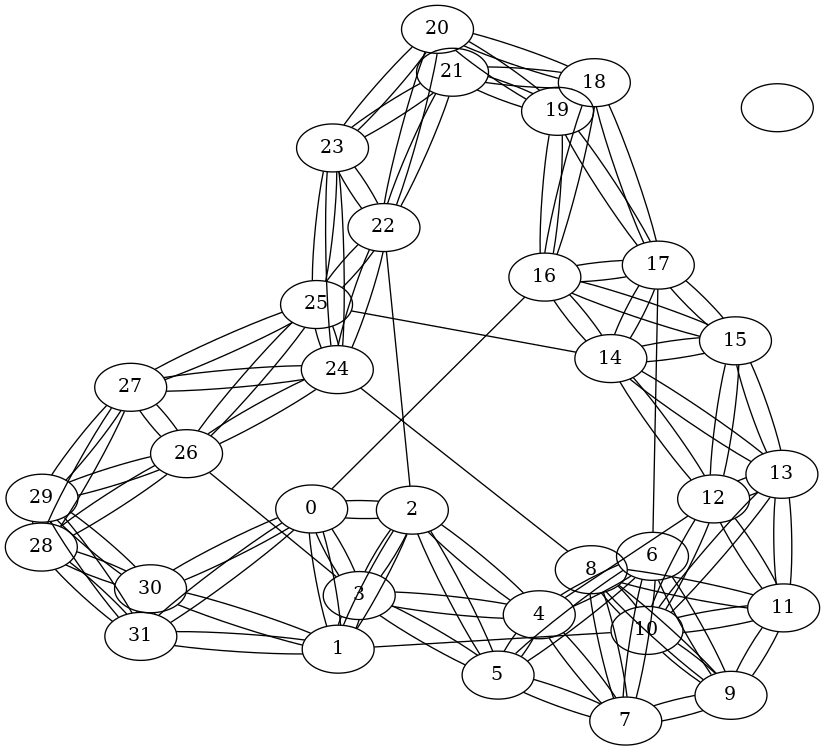

In [8]:
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_32_2 = c.divideCorralK_complete(basic_corral_16_2, 32, 2)
new_edges_32_32 = c.divideCorralK_complete(basic_corral_16_2, 32, 32)
new_edges_32_16 = c.divideCorralK_complete(basic_corral_16_2, 32, 16)
new_edges_32_8 = c.divideCorralK_complete(basic_corral_16_2, 32, 8)

corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_32_32 = np.append(basic_corral_16_2, new_edges_32_32, axis=0)
corral_32_16 = np.append(basic_corral_16_2, new_edges_32_16, axis=0)
corral_32_8 = np.append(basic_corral_16_2, new_edges_32_8, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_32_32))
display(pretty_print(corral_32_16))
display(pretty_print(corral_32_8))

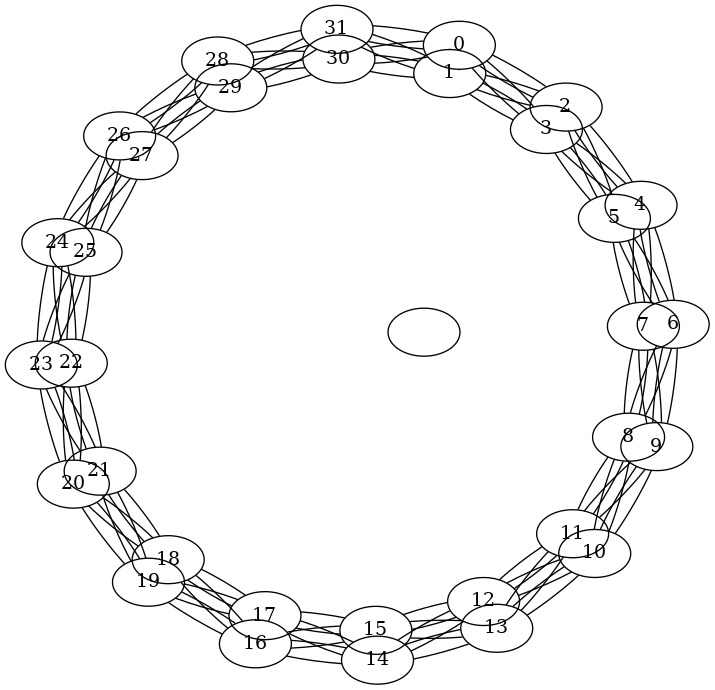

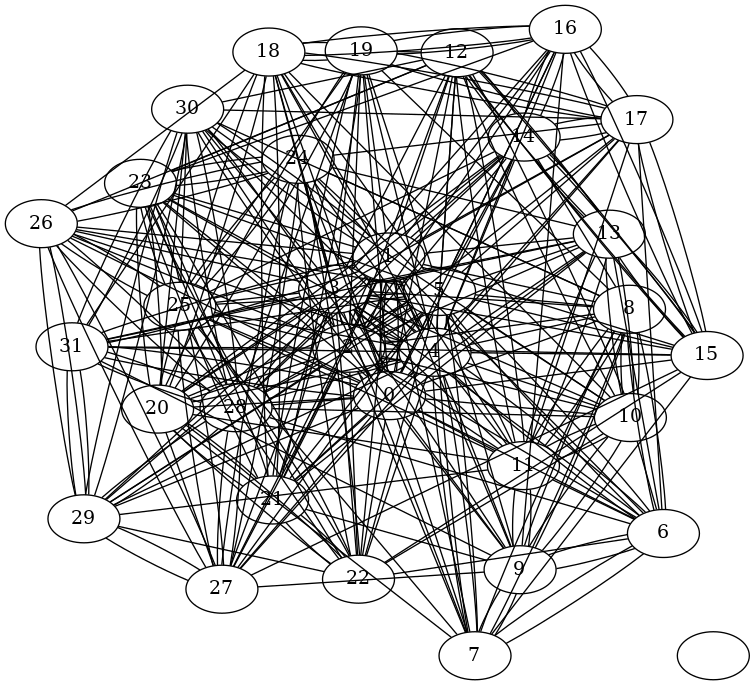

In [9]:
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_32_2 = c.divideCorralK_complete(basic_corral_16_2, 32, 200)
corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)

display(pretty_print(corral_32_2))

In [1]:
# test benchmarking for diff amounto of qubits and different connectivities
from src.clonk.benchmark_suite.backend_suite_corral import simple_backends_v3

print([backend.label for backend in simple_backends_v3])

['Corral_N_16_(0,1)_K_16_v_1-smallv3', 'Corral_N_16_(0,1)_K_128_v_1-smallv3', 'Corral_N_16_(0,1)_K_1000_v_1-smallv3', 'Corral_N_16_(0,1)_K_2000_v_1-smallv3']


In [2]:
from src.clonk.benchmark_suite.circuit_suite import circuits

q_size = 4
circuits["QAOA_Vanilla"].circuit_lambda(q_size).decompose().draw()

┌─────────┐                                                     »
 q_0: ┤ U2(0,π) ├──■──────────────────■────────────────────────────■──»
      ├─────────┤  │                  │                          ┌─┴─┐»
 q_1: ┤ U2(0,π) ├──┼──────────────────┼────■──────────────────■──┤ X ├»
      ├─────────┤┌─┴─┐┌────────────┐┌─┴─┐┌─┴─┐┌────────────┐┌─┴─┐└───┘»
 q_2: ┤ U2(0,π) ├┤ X ├┤ U1(-10.04) ├┤ X ├┤ X ├┤ U1(-10.04) ├┤ X ├─────»
      ├─────────┤└───┘└────────────┘└───┘└───┘└────────────┘└───┘     »
 q_3: ┤ U2(0,π) ├─────────────────────────────────────────────────────»
      └─────────┘                                                     »
m0: 4/════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                             »
« q_0: ───────────────■───────────────────────────────────────────────────────»
«      ┌───────────┐┌─┴─┐                       ┌────────────┐             ┌─┐»
« q_1: ┤ U1(10.04) ├┤ X ├──■─────────────────■──┤ R(10.21,0) ├─────────────┤M├»
«      └───────────┘└───┘  │                 │  └────────────┘             └╥┘»
« q_2: ────────────────────┼─────────────────┼────────■─────────────────────╫─»
«                        ┌─┴─┐┌───────────┐┌─┴─┐    ┌─┴─┐     ┌───────────┐ ║ »
« q_3: ──────────────────┤ X ├┤ U1(10.04) ├┤ X ├────┤ X ├─────┤ U1(10.04) ├─╫─»
«                        └───┘└───────────┘└───┘    └───┘     └───────────┘ ║ »
«m0: 4/═════════════════════════════════════════════════════════════════════╩═»
«                                                                           1 »
«                                      ┌────────────┐┌─┐   
« q_0: ───────■─────────────────────■──┤ R(10.21,0) ├┤M├───
«             │                     │  └────────────┘└╥┘   
« q_1: ───────┼─────────────────────┼─────────────────╫────
«             │  ┌────────────┐┌─┐  │                 ║    
« q_2: ──■────┼──┤ R(10.21,0) ├┤M├──┼─────────────────╫────
«      ┌─┴─┐┌─┴─┐├────────────┤└╥┘┌─┴─┐┌────────────┐ ║ ┌─┐
« q_3: ┤ X ├┤ X ├┤ U1(-10.04) ├─╫─┤ X ├┤ R(10.21,0) ├─╫─┤M├
«      └───┘└───┘└────────────┘ ║ └───┘└────────────┘ ║ └╥┘
«m0: 4/═════════════════════════╩═════════════════════╩══╩═
«                               2                     0  3

Starting benchmark for Quantum_Volume
Transpiler qc4 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc6 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc8 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc12 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc14 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc16 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Starting benchmark for QFT
Transpiler qc4 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc6 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc8 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc12 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc14 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc16 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Starting benchmark for QAOA_Vanilla
Transpiler qc4 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc6 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc8 for Corral_N_16_(0,1)_K_1000_v_1-smallv3
Transpiler qc12 for Corral_N_16_(0,1)_K_1000_v_1-smal

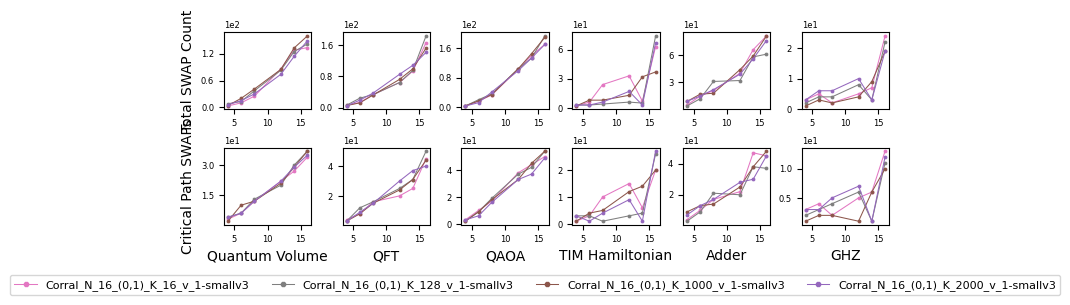

In [3]:
from src.clonk.benchmark_suite.circuit_suite import circuits
from src.clonk.benchmark_suite.main_plotting import benchmark, plot_wrap

#NOTE if run w/ diff params, check main_plotting function to check if different colors will be set

for circuit_gen in circuits.values():
    benchmark(
        backends=simple_backends_v3,
        circuit_generator=circuit_gen,
        q_range=[4, 6, 8, 12, 14, 16],
        continuously_save=1,
        overwrite=0,  # NOTE: turn this to 1 if you want to scrap the saved data and recollect a new batch
        repeat=1,
    )

# NOTE when plotting use motivation = 1 to plot SWAP counts, and motivation = 0 to plot gate durations
plot_wrap(simple_backends_v3, circuits.keys(), motivation=True, plot_average=True)

In [41]:
#Find way to get longest path in design for when adding edges
import retworkx as rx
import pydot
import os
import tempfile
from PIL import Image


basic_corral_16_2 = corral(16, 2)

# from qiskit.converters import circuit_to_dag, dag_to_circuit

graph = rx.PyGraph() #convert corral to graph to use rx libraries
graph.add_nodes_from(list(range(16)))
for edge in basic_corral_16_2:
    graph.add_edge(edge[0],edge[1], 1)
dot_str = graph.to_dot(
    lambda node: dict(
        color='black', fillcolor='lightblue', style='filled'))
dot = pydot.graph_from_dot_data(dot_str)[0]

with tempfile.TemporaryDirectory() as tmpdirname:
    tmp_path = os.path.join(tmpdirname, 'graph.png')
    dot.write_png(tmp_path)
    image = Image.open(tmp_path)
    os.remove(tmp_path)
# image #uncomment to display graph
temp_dist_matrix = rx.graph_distance_matrix(graph) #get distance matrix
print(temp_dist_matrix) #iterate over matrix? doesn't seem good scaling...
# #useful?
# edgeList = retworkx.all_pairs_dijkstra_path_lengths

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1.]
 [1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2.]
 [2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3.]
 [3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4.]
 [4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5.]
 [5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7. 6.]
 [6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 7.]
 [7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
 [7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
 [6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
 [5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
 [4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
 [3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
 [2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
 [1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1. 0.]]
